Visualizer
======
Histograms for the training data

First import everything




In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('train.csv')
print(df.head(3))

price = df['SalePrice']

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  

[3 rows x 81 columns]


## SalePrice
Check whether the saleprice is normally distributed.

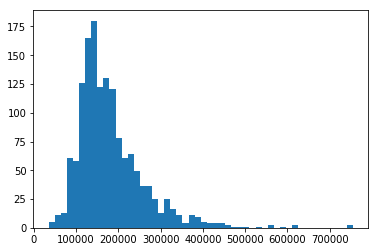

In [27]:
plt.hist(price, bins=50)
plt.show()

The Houseprice seems normally distributed. However, there are some outlier that we might discard that have a value greater than 500k. The total count of these occurences are:

In [30]:
len(df[price>500000])

9

## LotFrontage
Replace all the nans with value of '0' to make sure they are outside of the spectrum

_(there were no 0 values observed)_

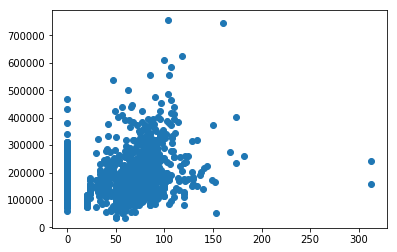

In [16]:
x = df['LotFrontage'].fillna(0)
plt.scatter(x, price)
plt.show()

Two outliers are being observed, where the LotFrontage is greater than 300.
These correspond to the rows:

In [20]:
df[df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Also, two outliers could be where the houseprice is greater than 700k:

In [22]:
df[price>700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
